Imports pandas for data manipulation and analysis, especially useful for working with tabular data (data structured in rows and columns, similar to a spreadsheet or SQL table).

Imports the time module, which provides various functions to measure and work with time in Python. Here, it’s likely being used to compare the execution times of two algorithms by recording start and end times around each algorithm.

mports the profile decorator from the memory_profiler library. The profile decorator is used to monitor the memory usage of specific functions. This can help measure and compare the memory usage of two algorithms.

%load_ext memory_profiler is a Jupyter Notebook magic command that loads the memory_profiler extension into the current notebook session.
This allows you to use the @profile decorator in the notebook to measure memory usage directly without needing to run the profiler as a separate command.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import time # to compare the time the two algorithms taken
from memory_profiler import profile
%load_ext memory_profiler

### 1. KMP Algorithm (Knuth-Morris-Pratt pattern matching algorithm)

compute_lps(pattern): This function computes the Longest Prefix Suffix (LPS) array for the given pattern. 
The LPS array helps in determining how much to shift the pattern upon a mismatch, allowing the KMP algorithm to avoid redundant comparisons.
    lps[i] stores the length of the longest prefix that is also a suffix for the substring ending at index i.
    j is used to track the length of the current prefix that matches the suffix.
    
Main KMP Search:
    The KMP function uses the lps array to search for occurrences of pattern in text.
    Two indices, i for text and j for pattern, are used to iterate and match characters.
    When j equals the length of the pattern, it means a match has been found, and 
    the starting index of the match (i - j) is added to matches.
    If a mismatch occurs and j is not zero, j is updated using the lps array to skip unnecessary characters.


In [3]:
def KMP(pattern, text):
    def compute_lps(pattern):
        lps = [0] * len(pattern)
        j = 0 #Sets j = 0, a pointer to keep track of the length of the current matching prefix in the pattern
        # Starts a loop from the second character (i = 1) in pattern to build the LPS array by comparing characters in the pattern
        for i in range(1, len(pattern)):
            # If pattern[i] matches pattern[j], increment j (extending the length of the matching prefix) and set lps[i] = j. 
            #This means the length of the longest prefix that is also a suffix at position i is j.
            if pattern[i] == pattern[j]:
                j += 1
                lps[i] = j
            else: # If there’s a mismatch and j is not zero (indicating that a partial match exists up to this point), 
                #update j to the previous longest prefix-suffix length lps[j - 1]. i -= 1 is used to retry the current character with the updated j
                if j != 0:
                    j = lps[j - 1]
                    i -= 1
                else: #If j is zero (no matching prefix suffix exists up to this point), 
                    #set lps[i] = 0, meaning there's no prefix-suffix match for this position
                    lps[i] = 0
        return lps # Returns the completed lps array

    lps = compute_lps(pattern) #Computes the lps array for the pattern by calling compute_lps
    #Initializes pointers i and j to zero, where i tracks the position in the text and j tracks the position in the pattern. 
    #matches is initialized as an empty list to store the starting indices of pattern matches in text
    i = j = 0
    matches = []
    while i < len(text): #Starts a loop that runs until the end of text is reached
        # If pattern[j] matches text[i], both i and j are incremented to continue matching the next characters
        if pattern[j] == text[i]:
            i += 1
            j += 1
        # If j equals len(pattern), it means a complete match for pattern has been found in text. 
        #Append the starting index of the match, i - j, to matches. 
        #Then, set j = lps[j - 1] to prepare for any subsequent potential matches without rechecking already matched characters
        if j == len(pattern):
            matches.append(i - j)
            j = lps[j - 1]
        # If there’s a mismatch and i hasn’t reached the end of text, check if j is non-zero. 
        #If so, set j = lps[j - 1] to skip unnecessary comparisons. 
        #If j is zero, increment i to check the next position in text.
        elif i < len(text) and pattern[j] != text[i]:
            if j != 0:
                j = lps[j - 1]
            else:
                i += 1
    return matches #return the list matches containing the starting indices of all occurrences of pattern in text


### 2. Naive search Algorithm

In [4]:
# Defines a function naive_pattern_match that takes two arguments:
    #pattern: the substring to search for.
    #text: the string in which to search for the pattern.
def naive_pattern_match(pattern, text):
    M = len(pattern) #Calculates the lengths of pattern and text, storing them in M and N
    N = len(text)
    positions = [] #Initializes an empty list positions to store 
                #the starting indices of each occurrence of the pattern found in the text.

    # Loop through the text
    #The loop range is N - M + 1 to avoid going out of bounds. 
    #Here, i represents the current position in text where we start trying to match pattern
    for i in range(N - M + 1):
        j = 0 #Initializes j = 0, which will be used to track the index within pattern while comparing characters

        # Check for match
        #This while loop checks each character in pattern against the corresponding character in text starting from position i
        #The loop continues as long as j is less than M (the length of pattern) and text[i + j] == pattern[j].
            #If the characters match, j is incremented to check the next character.
            #If a mismatch occurs, the loop breaks.
        while j < M and text[i + j] == pattern[j]:
            j += 1
        # j equals M, it means that all characters in pattern matched with the substring in text starting at i. 
        #Thus, the starting index i is appended to positions
        if j == M:
            positions.append(i)
    # Returns the list positions, which contains all starting indices where pattern occurs in text
    return positions

### 3. Load Dataset

In [5]:
data = pd.read_csv('data.csv')

##### 3.1 Pattern to be searched

In [6]:
pattern = 'ኢትዮጵያ'

#### 3.2 Longest common subsequence

LCS that takes two arguments, X and Y, which represent the two sequences (strings or lists) for which we want to find the length of the longest common subsequence.

m and n store the lengths of sequences X and Y, respectively. These values will define the dimensions of the matrix L used to store the LCS lengths.

Creates a 2D list L of size (m + 1) x (n + 1) with all values initialized to 0. Each cell L[i][j] will eventually contain the length of the LCS of the first i characters of X and the first j characters of Y.

Adding an extra row and column (i.e., (m + 1) and (n + 1)) simplifies the handling of boundary conditions where either sequence has no characters.

starts a loop over i from 0 to m, inclusive. i represents the length of the subsequence of X being considered.

starts an inner loop over j from 0 to n, inclusive. j represents the length of the subsequence of Y being considered.

If either i or j is 0, the function sets L[i][j] = 0. This is because an LCS involving an empty sequence (either X[:0] or Y[:0]) has a length of 0.

If the characters X[i-1] and Y[j-1] are the same, then they are part of the LCS up to this point. The value of L[i][j] is set to L[i-1][j-1] + 1, meaning we take the LCS length up to the previous characters and add 1 for the matching character.

If X[i-1] and Y[j-1] are different, then L[i][j] is set to the maximum of L[i-1][j] and L[i][j-1], representing the LCS found by either ignoring the current character in X or the current character in Y.

Finally, the function returns L[m][n], which holds the length of the LCS of X and Y (i.e., the solution for the entire sequences).

In [7]:
def LCS(X, Y):
    m = len(X)
    n = len(Y)
    L = [[0] * (n + 1) for i in range(m + 1)]
    for i in range(m + 1):
        for j in range(n + 1):
            if i == 0 or j == 0:
                L[i][j] = 0
            elif X[i-1] == Y[j-1]:
                L[i][j] = L[i-1][j-1] + 1
            else:
                L[i][j] = max(L[i-1][j], L[i][j-1])
    return L[m][n]


In [8]:
text1 = "ከአሰልጣኝ ሰውነት ቢሻው በፊት የኢትዮጵያ ብሄራዊ ቡድንን ለ4 ወራት በጊዜያዊነት ያሰለጠኑት  ቤልጅየማዊው ቶም ሴይንትፌይት ዋልያዎቹን መረከብ እንደሚፈልጉ ለሱፐር ስፖርት ተናግረዋል፡፡"
text2 = "ከኢትዮጵያ በተጨማሪ በርካታ የአፍሪካ ብሄራዊ ቡድኖችን በማሰልጠናቸው ለአፍሪካ የእግርኳስ ባህል ቅርብ ናቸው፡፡  የ40 አመቱ አሰልጣኝ በኦክቶበር መጨረሻ ከፌዴሬሽኑ ጋር በፈጠሩት አለመግባባት ከዋልያዎቹ ጋር መለያየታቸው  ይታወሳል፡፡"
LCS(text1,text2) ## It tells how many common sequences are there between the two texts (text1 and text2)

43

#### 3.3 Checking Patterns founding Index/Indices Using KMP Algorithm
Initializes the variable row to 0. This variable will store the index of each row as the code iterates through the rows of data.
Starts a loop over each row in data, where i is the index of the current row.
len(data) gives the total number of rows in the data DataFrame.

Updates the row variable to the current row index i. This line might seem redundant here, but it sets up row for each iteration in case it’s needed outside the for loop scope.

Calls the KMP function (Knuth-Morris-Pratt pattern matching algorithm) to find occurrences of the specified pattern in the i-th row of the column named '0' in data.
data['0'][i] accesses the value in the column labeled '0' in the i-th row.
matches will contain the list of starting indices within the row where pattern was found. If pattern is not found, matches will be an empty list.

Checks if matches is non-empty, meaning that at least one match was found in the current row.

Prints a message indicating the row where the pattern was found (row) and the indices within the row where it was located (matches). If matches contains multiple indices, they will all be displayed.

In [9]:
row = 0
for i in range(len(data)):
    row = i
    matches = KMP(pattern, data['0'][i])
    if len(matches) != 0:
        print("Pattern found at row ",row, "at the following index/indexes ", matches)


Pattern found at row  1 at the following index/indexes  [35, 223, 323, 352, 403, 686, 752, 782, 865, 948, 965, 977, 1266, 1283, 1342, 1414]
Pattern found at row  3 at the following index/indexes  [11, 87, 850, 885]
Pattern found at row  5 at the following index/indexes  [77, 767, 813]
Pattern found at row  6 at the following index/indexes  [49, 182, 268, 328]
Pattern found at row  7 at the following index/indexes  [87, 234]
Pattern found at row  8 at the following index/indexes  [11, 157, 378, 416, 475, 568, 603]
Pattern found at row  10 at the following index/indexes  [32, 169, 1678]
Pattern found at row  14 at the following index/indexes  [92, 190]
Pattern found at row  15 at the following index/indexes  [22, 103, 429, 475, 638]
Pattern found at row  16 at the following index/indexes  [150, 791, 824, 861, 889, 905, 946, 1000, 1056]
Pattern found at row  17 at the following index/indexes  [67, 323, 340, 426, 475, 605, 696, 744, 772, 801, 819, 830, 872, 925, 981]
Pattern found at row  

#### 3.4 Checking Patterns founding Index/Indices Using Naive Algorithm
Initializes the variable row to 0. This variable will store the index of each row as the code iterates through the rows of data. Starts a loop over each row in data, where i is the index of the current row. len(data) gives the total number of rows in the data DataFrame.

Updates the row variable to the current row index i. This line might seem redundant here, but it sets up row for each iteration in case it’s needed outside the for loop scope.

Calls the Naive function (Naive pattern matching algorithm) to find occurrences of the specified pattern in the i-th row of the column named '0' in data. data['0'][i] accesses the value in the column labeled '0' in the i-th row. matches will contain the list of starting indices within the row where pattern was found. If pattern is not found, matches will be an empty list.

Checks if matches is non-empty, meaning that at least one match was found in the current row.

Prints a message indicating the row where the pattern was found (row) and the indices within the row where it was located (matches). If matches contains multiple indices, they will all be displayed.

In [10]:
row = 0
for i in range(len(data)):
    row = i
    matches = naive_pattern_match(pattern, data['0'][i])
    if len(matches) != 0:
        print("Pattern found at row ",row, "at the following index/indexes ", matches)


Pattern found at row  1 at the following index/indexes  [35, 223, 323, 352, 403, 686, 752, 782, 865, 948, 965, 977, 1266, 1283, 1342, 1414]
Pattern found at row  3 at the following index/indexes  [11, 87, 850, 885]
Pattern found at row  5 at the following index/indexes  [77, 767, 813]
Pattern found at row  6 at the following index/indexes  [49, 182, 268, 328]
Pattern found at row  7 at the following index/indexes  [87, 234]
Pattern found at row  8 at the following index/indexes  [11, 157, 378, 416, 475, 568, 603]
Pattern found at row  10 at the following index/indexes  [32, 169, 1678]
Pattern found at row  14 at the following index/indexes  [92, 190]
Pattern found at row  15 at the following index/indexes  [22, 103, 429, 475, 638]
Pattern found at row  16 at the following index/indexes  [150, 791, 824, 861, 889, 905, 946, 1000, 1056]
Pattern found at row  17 at the following index/indexes  [67, 323, 340, 426, 475, 605, 696, 744, 772, 801, 819, 830, 872, 925, 981]
Pattern found at row  

### 4. Measure the performance in terms of time and memory

In [11]:
#!pip install memory-profiler
# if memory-profiler is not install tou can install by removing hash 

#### 4.1 Test on KMP algorithm and measure the performance in terms of time and memory

Defines a function named run_kmp_algorithm. This function is designed to perform the Knuth-Morris-Pratt (KMP) pattern-matching algorithm on a dataset and report the time it takes to execute.

Initializes an empty list output that will store the results of each pattern match found in the data. Each match will be recorded as a dictionary with information about the row and match indices.

Records the current time (in seconds since the epoch) at the start of the function’s execution. start_time will be used to calculate how long the function takes to execute.

Initializes a variable row to 0. This will be used to keep track of the row index during the loop through data.
Starts a loop to iterate over each row in the data DataFrame, where i is the current row index.
len(data) gives the number of rows in data.
Updates the row variable to the current row index i. This records which row the loop is currently processing.

Calls the KMP function (Knuth-Morris-Pratt pattern matching algorithm) with pattern and data['0'][i] as inputs.
data['0'][i] accesses the value in the column named '0' in the current row i.
matches will contain the starting indices where pattern is found in this row’s value. If pattern is not found, matches will be an empty list.

Checks if matches is non-empty, which indicates that the pattern was found at least once in the current row.
Initializes an empty dictionary kmp_result to store the information for the current row where a pattern match was found.
Sets the 'row' key in kmp_result to the value of row, which is the index of the current row in data.
Sets the 'match index' key in kmp_result to matches, which contains the list of indices where the pattern was found in the current row.
Appends the kmp_result dictionary to the output list, storing the results for this row.

Records the current time at the end of the function’s execution. This will be used with start_time to calculate the total execution time.
Calculates the total execution time of the function by subtracting start_time from end_time and stores the result in kmp_time.
Prints the total execution time kmp_time, which shows how long the function took to run.

Converts output, which is a list of dictionaries, into a DataFrame d. Each dictionary in output becomes a row in d, with keys as column names ('row' and 'match index').
Prints the DataFrame d, which contains the rows and match indices where the pattern was found in data.

In [12]:
def run_kmp_algorithm():
    output = []
    start_time = time.time()
    row = 0
    for i in range(len(data)):
        row = i
        matches = KMP(pattern, data['0'][i])
        if len(matches) != 0:
            kmp_result = {}
            kmp_result['row'] = row
            kmp_result['match index'] = matches 
            output.append(kmp_result)
    end_time = time.time()
    kmp_time = end_time - start_time
    print(kmp_time) 
    d = pd.DataFrame(output)
    print(d)
    # Create a new column that holds the number of matches for each row
    d['num_matches'] = d['match index'].apply(len)

    # Plot a bar chart to show number of matches per row
    plt.figure(figsize=(10, 6))
    plt.bar(d['row'], d['num_matches'], color='skyblue')
    plt.xlabel('Row')
    plt.ylabel('Number of Matches')
    plt.title('Number of Matches per Row using KMP Algorithm')
    plt.xticks(rotation=90)
    plt.show()

command in Jupyter Notebook used to measure the memory usage of the run_kmp_algorithm() function.

The output

Peak memory shows the maximum memory usage reached while running run_kmp_algorithm().
Increment indicates the memory usage change during the function’s execution.

0.04686427116394043
    row                                        match index
0     1  [35, 223, 323, 352, 403, 686, 752, 782, 865, 9...
1     3                                 [11, 87, 850, 885]
2     5                                     [77, 767, 813]
3     6                                [49, 182, 268, 328]
4     7                                          [87, 234]
..  ...                                                ...
62   87                                               [42]
63   88                                 [50, 89, 346, 484]
64   89                                              [262]
65   91                                          [54, 190]
66   96             [9, 60, 202, 246, 339, 470, 503, 1391]

[67 rows x 2 columns]


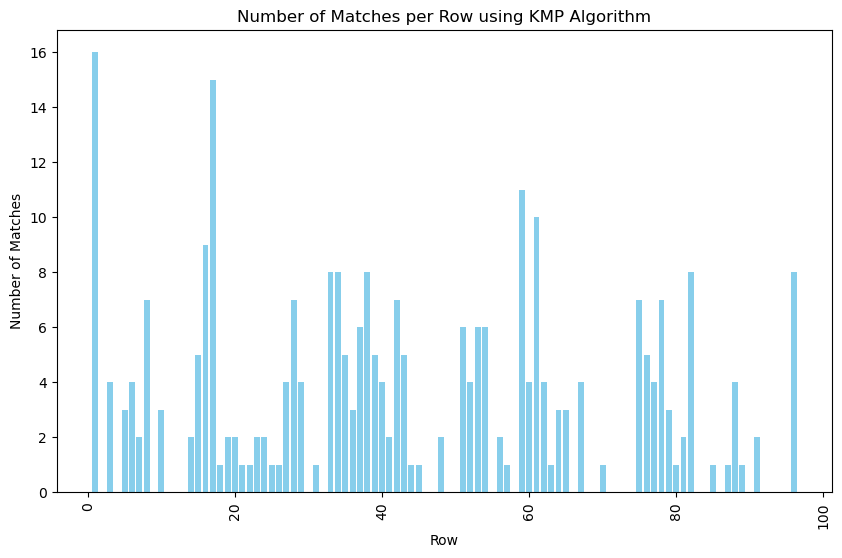

peak memory: 157.12 MiB, increment: 10.00 MiB


In [13]:
%memit run_kmp_algorithm()

#### 4.2 Test on Naive algorithm and measure the performance in terms of time and memory

Defines a function named run_naive_algorithm. This function is designed to perform the Naive pattern-matching algorithm on a dataset and report the time it takes to execute.

Initializes an empty list output that will store the results of each pattern match found in the data. Each match will be recorded as a dictionary with information about the row and match indices.

Records the current time (in seconds since the epoch) at the start of the function’s execution. start_time will be used to calculate how long the function takes to execute.

Initializes a variable row to 0. This will be used to keep track of the row index during the loop through data.
Starts a loop to iterate over each row in the data DataFrame, where i is the current row index.
len(data) gives the number of rows in data.
Updates the row variable to the current row index i. This records which row the loop is currently processing.

Calls the naive function (Naive pattern matching algorithm) with pattern and data['0'][i] as inputs.
data['0'][i] accesses the value in the column named '0' in the current row i.
matches will contain the starting indices where pattern is found in this row’s value. If pattern is not found, matches will be an empty list.

Checks if matches is non-empty, which indicates that the pattern was found at least once in the current row.
Initializes an empty dictionary kmp_result to store the information for the current row where a pattern match was found.
Sets the 'row' key in kmp_result to the value of row, which is the index of the current row in data.
Sets the 'match index' key in kmp_result to matches, which contains the list of indices where the pattern was found in the current row.
Appends the kmp_result dictionary to the output list, storing the results for this row.

Records the current time at the end of the function’s execution. This will be used with start_time to calculate the total execution time.
Calculates the total execution time of the function by subtracting start_time from end_time and stores the result in kmp_time.
Prints the total execution time kmp_time, which shows how long the function took to run.

Converts output, which is a list of dictionaries, into a DataFrame d. Each dictionary in output becomes a row in d, with keys as column names ('row' and 'match index').
Prints the DataFrame d, which contains the rows and match indices where the pattern was found in data.

In [14]:
def run_naive_algorithm():
    output = []
    start_time = time.time()
    row = 0
    for i in range(len(data)):
        row = i
        matches = naive_pattern_match(pattern, data['0'][i])
        if len(matches) != 0:
            naive_result = {}
            naive_result['row'] = row
            naive_result['match index'] = matches 
            output.append(naive_result)    
    end_time = time.time()
    naive_time = end_time - start_time
    print(naive_time)
    d = pd.DataFrame(output)
    print(d)
    # Create a new column that holds the number of matches for each row
    d['num_matches'] = d['match index'].apply(len)

    # Plot a bar chart to show number of matches per row
    plt.figure(figsize=(10, 6))
    plt.bar(d['row'], d['num_matches'], color='skyblue')
    plt.xlabel('Row')
    plt.ylabel('Number of Matches')
    plt.title('Number of Matches per Row using Naive Algorithm')
    plt.xticks(rotation=90)
    plt.show()

command in Jupyter Notebook used to measure the memory usage of the run_naive_algorithm() function.

The output

Peak memory shows the maximum memory usage reached while running run_naive_algorithm().
Increment indicates the memory usage change during the function’s execution.

0.021423816680908203
    row                                        match index
0     1  [35, 223, 323, 352, 403, 686, 752, 782, 865, 9...
1     3                                 [11, 87, 850, 885]
2     5                                     [77, 767, 813]
3     6                                [49, 182, 268, 328]
4     7                                          [87, 234]
..  ...                                                ...
62   87                                               [42]
63   88                                 [50, 89, 346, 484]
64   89                                              [262]
65   91                                          [54, 190]
66   96             [9, 60, 202, 246, 339, 470, 503, 1391]

[67 rows x 2 columns]


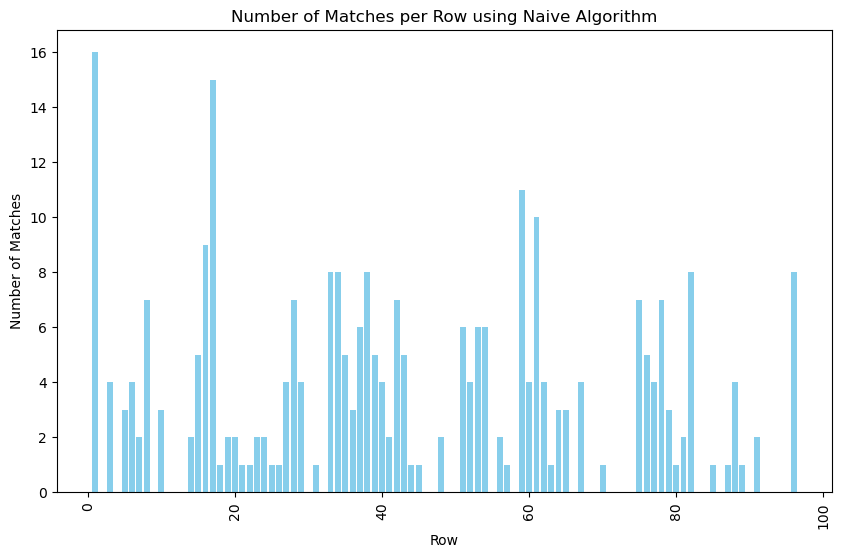

peak memory: 154.07 MiB, increment: 2.32 MiB


In [15]:
%memit run_naive_algorithm()

#### Discussion

As we see in the previous outputs, there is no difference in their output. but, in memory consumption there is a difference (157.12 MiB, increment: 10.00 MiB on KMP and 154.07 MiB, increment: 2.32 MiB on Naive algorithm with minimum increament compared with KMP and lower memory usage compared with KMP), and also there is difference in the computing time. By the time of the code run, the kmp algorithm has taken about 0.04686427116394043 seconds and the naive algorithm takes 0.021423816680908203 seconds to search for the pattern in the rows of the given data. the gap might become big when the size of the data grows up. to check on this, we have to increase the amount of data to search the pattern from.